In [11]:
import sqlite3
import pandas as pd
import matplotlib.pyplot as plt

# Connect to SQLite DB
conn = sqlite3.connect("./Mod-3-Project.db")



In [13]:
sat_wait = pd.read_sql_query("""
SELECT a.attraction_name,
       a.category,
       AVG(r.wait_minutes) AS avg_wait,
       AVG(r.satisfaction_rating) AS avg_satisfaction,
       COUNT(*) AS n_rides
FROM fact_ride_events r
JOIN dim_attraction a ON r.attraction_id = a.attraction_id
WHERE r.wait_minutes IS NOT NULL 
  AND r.satisfaction_rating IS NOT NULL
GROUP BY a.attraction_name, a.category
ORDER BY avg_wait DESC;
""", conn)

conn.close()

# Scatter plot
plt.figure(figsize=(9,6))
plt.scatter(sat_wait["avg_wait"], sat_wait["avg_satisfaction"], s=sat_wait["num_rides"]/2, alpha=0.6)
for i, txt in enumerate(sat_wait["attraction_name"]):
    if sat_wait["num_rides"][i] > 50:  # annotate only popular rides
        plt.annotate(txt, (sat_wait["avg_wait"][i], sat_wait["avg_satisfaction"][i]))

plt.title("Attraction Wait Time vs Satisfaction")
plt.xlabel("Average Wait (minutes)")
plt.ylabel("Average Satisfaction (1–5)")
plt.grid(True, linestyle="--", alpha=0.6)
plt.tight_layout()
plt.savefig("figures/attraction_wait_vs_satisfaction.png")

DatabaseError: Execution failed on sql '
SELECT a.attraction_name,
       a.category,
       AVG(r.wait_minutes) AS avg_wait,
       AVG(r.satisfaction_rating) AS avg_satisfaction,
       COUNT(*) AS n_rides
FROM fact_ride_events r
JOIN dim_attraction a ON r.attraction_id = a.attraction_id
WHERE r.wait_minutes IS NOT NULL 
  AND r.satisfaction_rating IS NOT NULL
GROUP BY a.attraction_name, a.category
ORDER BY avg_wait DESC;
': no such table: fact_ride_events

In [5]:
clv = pd.read_sql_query("""
SELECT g.home_state,
       SUM(v.spend_cents_clean)/100.0 AS clv_dollars
FROM fact_visits v
JOIN dim_guest g ON v.guest_id = g.guest_id
GROUP BY g.home_state
ORDER BY clv_dollars DESC;
""", conn)

plt.figure(figsize=(8,5))
plt.bar(clv["home_state"], clv["clv_dollars"])
plt.title("Customer Lifetime Value by State")
plt.xlabel("Home State")
plt.ylabel("Total Spend ($)")
plt.tight_layout()
plt.savefig("figures/clv_by_state.png")

DatabaseError: Execution failed on sql '
SELECT g.home_state,
       SUM(v.spend_cents_clean)/100.0 AS clv_dollars
FROM fact_visits v
JOIN dim_guest g ON v.guest_id = g.guest_id
GROUP BY g.home_state
ORDER BY clv_dollars DESC;
': no such table: fact_visits

FileNotFoundError: [Errno 2] No such file or directory: 'figures/wait_vs_satisfaction.png'

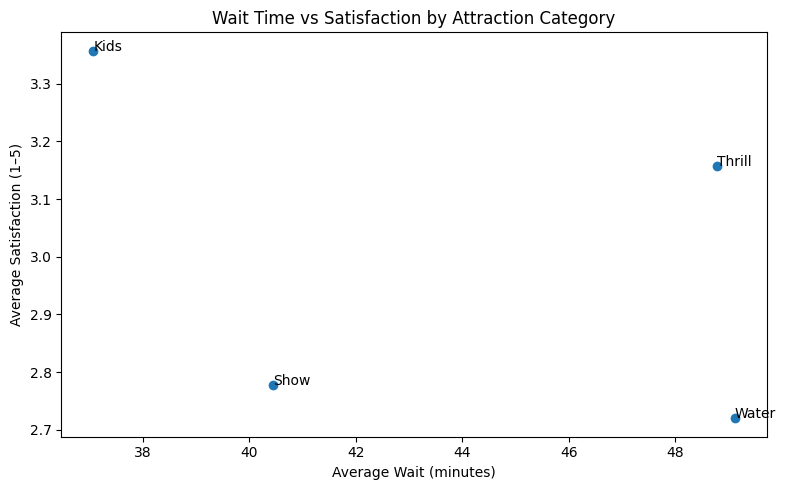

In [ ]:
waits = pd.read_sql_query("""
SELECT a.category,
       AVG(r.wait_minutes) AS avg_wait,
       AVG(r.satisfaction_rating) AS avg_satisfaction
FROM fact_ride_events r
JOIN dim_attraction a ON r.attraction_id = a.attraction_id
WHERE r.wait_minutes IS NOT NULL AND r.satisfaction_rating IS NOT NULL
GROUP BY a.category;
""", conn)

plt.figure(figsize=(8,5))
plt.scatter(waits["avg_wait"], waits["avg_satisfaction"])
for i, txt in enumerate(waits["category"]):
    plt.annotate(txt, (waits["avg_wait"][i], waits["avg_satisfaction"][i]))
plt.title("Wait Time vs Satisfaction by Attraction Category")
plt.xlabel("Average Wait (minutes)")
plt.ylabel("Average Satisfaction (1–5)")
plt.tight_layout()
plt.savefig("figures/wait_vs_satisfaction.png")

conn.close()
